In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
C = 3 
R = 1
L = 100
R = [1,500,1000]
f = [[2,3,4,5,6,6.5,6.7,6.9,7.0,7.1,7.3,7.5,7.7,8,10,12,14,16],
     [2,4,6,6.5,6.7,6.8,6.9,7.0,7.1,7.2,7.4,7.6,7.8,8,9,10,12,14,16],
     [2,4,6,6.5,6.7,6.9,7.1,7.3,7.5,7.7,8,10,12,14,16]]
     
U0 = [[8,12,16,28,56,90,120,155,167,170,160,145,128,100,40,25,19,15],
      [8,16,52,75,90,100,108,112,120,120,119,110,100,90,57,40,24,18,15],
      [8,17,36,40,43,44,45,47,47,46,44,30,23,18,14]]
I0 = [np.around(np.array(U0[i])/75, decimals=2) for i in range(3)]
I2 = [np.max(I0[i])/np.sqrt(2) for i in range(3)]

# for i in range(3):
#     print(len(f[i]))
#     print(len(U0[i]))

In [51]:
I0

[array([ 0.11,  0.16,  0.21,  0.37,  0.75,  1.2 ,  1.6 ,  2.07,  2.23,
         2.27,  2.13,  1.93,  1.71,  1.33,  0.53,  0.33,  0.25,  0.2 ]),
 array([ 0.11,  0.21,  0.69,  1.  ,  1.2 ,  1.33,  1.44,  1.49,  1.6 ,
         1.6 ,  1.59,  1.47,  1.33,  1.2 ,  0.76,  0.53,  0.32,  0.24,  0.2 ]),
 array([ 0.11,  0.23,  0.48,  0.53,  0.57,  0.59,  0.6 ,  0.63,  0.63,
         0.61,  0.59,  0.4 ,  0.31,  0.24,  0.19])]

In [192]:
fp = (np.pi * 2 * np.sqrt(L*C * 1e-9 * 1e-3))**(-1) * 1e-3

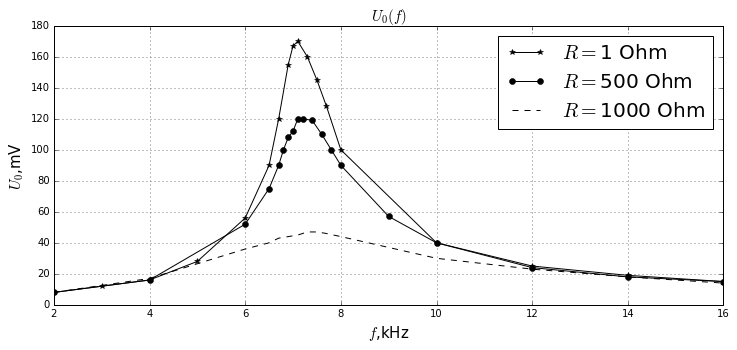

In [110]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.title(r'$U_0(f)$',fontsize=15)
plt.xlabel(r'$f$,kHz',fontsize=15)
plt.ylabel(r'$U_0$,mV',fontsize=15)
types = ['-*','-o','--']
for i in range(3):
    label = r'$R = $' + str(R[i]) + ' Ohm'
    plt.plot(f[i],U0[i],types[i],color='black',label=label)
plt.legend(fontsize=20)
plt.savefig('plot1.png')
plt.show()

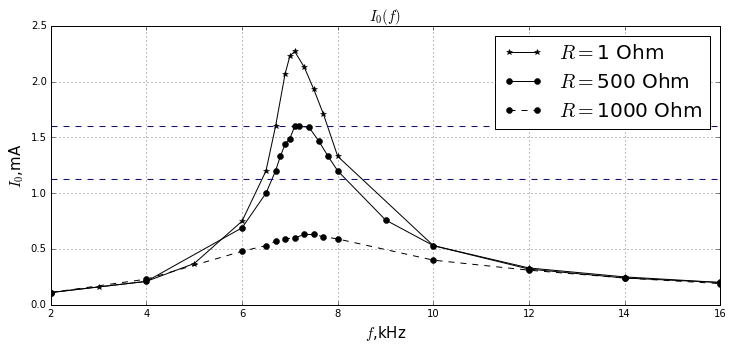

1.60513239329
1.1313708499


In [117]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.title(r'$I_0(f)$',fontsize=15)
plt.xlabel(r'$f$,kHz',fontsize=15)
plt.ylabel(r'$I_0$,mA',fontsize=15)

types = ['-*','-o','--o']
for i in range(3):
    label = r'$R = $' + str(R[i]) + ' Ohm'
    plt.plot(f[i],I0[i],types[i],color='black',label=label)
    if i != 2:
        plt.plot([2,16],[I2[i],I2[i]],'--',color='blue')
plt.legend(fontsize=20)
plt.savefig('plot2.png')
plt.show()
for i in range(2):
    print(I2[i])

In [138]:
f0 = f[0][np.argmax(I0[0])]
f0

7.1

In [194]:
f1 = f[0][6]
f2 = (f[0][12] + f[0][13])/2
df1 = f2 - f1
print(df1)
# print(f2)
Q1 = f0 / df1
Q1

1.1499999999999995


6.173913043478263

In [195]:
f1 = (f[1][3] + f[1][4])/2
f2 = f[1][13] + 0.1
df2 = f2 - f1
print(df2)
Q2 = f0 / df2
Q2

1.5


4.733333333333333

7.1

In [198]:
print(np.arange(1,11))
print([12.1,8.78,7.12,6.09,5.5,5.06,4.66,4.39,4.12,3.92])

[ 1  2  3  4  5  6  7  8  9 10]
[12.1, 8.78, 7.12, 6.09, 5.5, 5.06, 4.66, 4.39, 4.12, 3.92]


[ 0.17300933  0.32858765  0.49966655  0.68297637  0.83736515  0.98932556
  1.16645618  1.31435059  1.49226458  1.64842096]


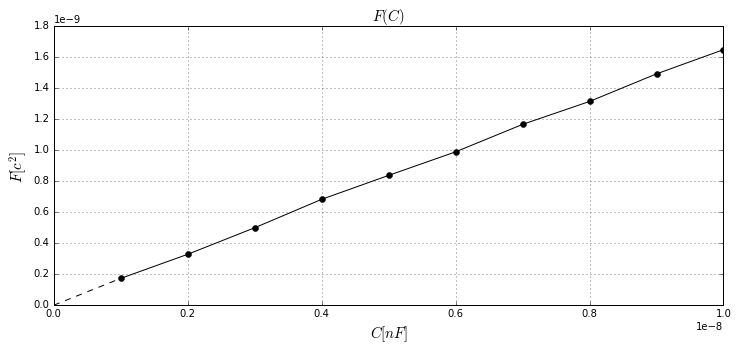

In [204]:
C2 = np.arange(1,11) * 1e-9
fp2 = np.array([12.1,8.78,7.12,6.09,5.5,5.06,4.66,4.39,4.12,3.92]) * 1e3
F = (fp2 * np.pi * 2 )**(-2)
print(F * 1e9)
plt.figure(figsize=(12,5))
plt.grid(True)
plt.title(r'$F(C)$',fontsize=15)
plt.xlabel(r'$C[nF]$',fontsize=15)
plt.ylabel(r'$F[c^2]$ ',fontsize=15)
plt.plot(C2,F,'-o',color='black')
plt.plot([0,C2[0]],[0,F[0]],'--',color='black')
plt.savefig('plot3.png')
plt.show()

In [171]:
dF = np.array([F[i] - F[i+1] for i in range(len(F) - 1)])
dt = np.array([C2[i] - C2[i+1] for i in range(len(F) - 1)])
tgarr = dF/dt
print(tgarr)
tg = np.mean(tgarr)
tg

[ 0.15557832  0.1710789   0.18330982  0.15438878  0.15196041  0.17713062
  0.1478944   0.177914    0.15615638]


0.16393462613966747

In [190]:
epsC = 0.05
sigmf = 0.02 * 1e3
epsf = sigmf / fp2
epsF = 2*epsf
sigmF = epsF * F
sigmC = epsC * C2
sigmdF = [np.sqrt(sigmF[i]**2 + sigmF[i+1]**2) for i in range(len(F) - 1)]
sigmdt = [np.sqrt(sigmC[i]**2 + sigmC[i+1]**2) for i in range(len(F) - 1)]
epsdF = np.abs(sigmdF / dF)
epsdt = np.abs(sigmdt / dt)
print('epsdF' + str(epsdF))
print('epsdt' + str(epsdt))
epstgarr = np.sqrt(epsdF**2 + epsdt**2)
print('epstgarr' + str(epstgarr))
sigmtgarr = epstgarr * tgarr
sigm2tgarr = sigmtgarr**2
sigmtg = 1/sqrt(len(tgarr)) * np.sqrt(np.mean(sigm2tgarr))
epstg = sigmtg / tg
print(sigmtg)
print(epstg)

epsdF[ 0.01030039  0.01859568  0.02886803  0.04899162  0.06522875  0.07172614
  0.10554812  0.10565162  0.14216455]
epsdt[ 0.1118034   0.18027756  0.25        0.32015621  0.39051248  0.46097722
  0.53150729  0.60207973  0.6726812 ]
epstgarr[ 0.11227688  0.1812341   0.25166121  0.32388297  0.39592271  0.466524
  0.54188597  0.6112792   0.68753964]
0.0238619497318
0.145557715863


In [214]:
tgarr = F / C2
tg = np.mean(tgarr)


sigmf = 0.02 * 1e3
epsf = sigmf / fp2
print(np.mean(epsf))
epsF = 2*epsf
epsC = 0.05
epstgarr = np.sqrt(epsC**2 + epsF**2)
sigmtgarr = epstgarr * tgarr
sigm2tgarr = sigmtgarr ** 2
sigmtg = 1/len(tgarr) * np.sqrt(np.sum(sigm2tgarr))
epstg = sigmtg / tg
print(tg)

print(sigmtg)
print(epstg)


0.00364168546079
0.166854307859
0.00266853673702
0.0159932145071
